<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=370ad7ba9ef43d9bb4d16f1362cb2ac336e25fb5752e2f7cf9443acf84769182
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [2]:
import pandas as pd
from google.colab import drive 
drive = drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB.csv")

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=train_features.shape[1]))
model.add(Dense(40, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= "sgd", metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                2550      
                                                                 
 dense_1 (Dense)             (None, 40)                1240      
                                                                 
 dense_2 (Dense)             (None, 3)                 123       
                                                                 
Total params: 3,913
Trainable params: 3,913
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(train_features, train_target, epochs = 100, batch_size=10, validation_split=0.02)

Epoch 1/100
1764/1764 [==============================] - 3s 2ms/step - loss: 1.0918 - accuracy: 0.3766 - val_loss: 1.1257 - val_accuracy: 0.2722
Epoch 2/100
1764/1764 [==============================] - 3s 2ms/step - loss: 1.0814 - accuracy: 0.3996 - val_loss: 1.0544 - val_accuracy: 0.5056
Epoch 3/100
1764/1764 [==============================] - 4s 2ms/step - loss: 1.0775 - accuracy: 0.4043 - val_loss: 1.1977 - val_accuracy: 0.2389
Epoch 4/100
1764/1764 [==============================] - 3s 1ms/step - loss: 1.0753 - accuracy: 0.4053 - val_loss: 1.1972 - val_accuracy: 0.2917
Epoch 5/100
1764/1764 [==============================] - 3s 1ms/step - loss: 1.0738 - accuracy: 0.4090 - val_loss: 1.1527 - val_accuracy: 0.4111
Epoch 6/100
1764/1764 [==============================] - 3s 1ms/step - loss: 1.0718 - accuracy: 0.4134 - val_loss: 1.1606 - val_accuracy: 0.3278
Epoch 7/100
1764/1764 [==============================] - 3s 2ms/step - loss: 1.0703 - accuracy: 0.4143 - val_loss: 1.1427 - val_ac

In [10]:
import matplotlib.pyplot as plt

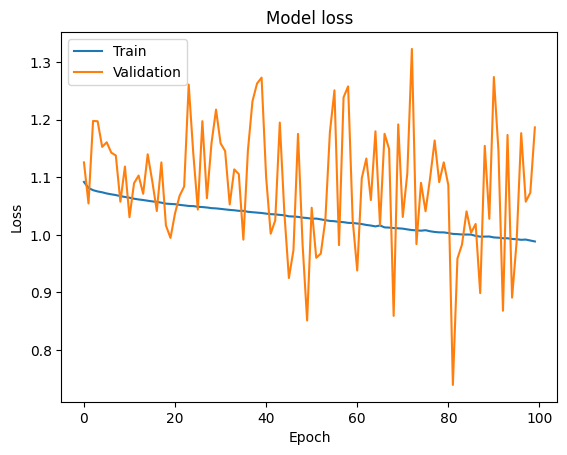

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
 
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
 
plt.show()

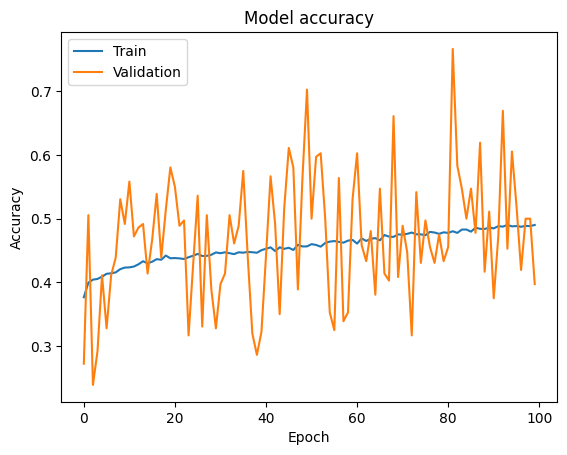

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
 
plt.show()

In [13]:
test_loss, test_accuracy = model.evaluate(test_features, test_target)

131/131 [==============================] - 1s 2ms/step - loss: 1.0381 - accuracy: 0.4635
